<a href="https://colab.research.google.com/github/taylan-sen/CIS355_FALL05/blob/main/SegmentationIntro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


![object detection vs. segmentation](https://www.cybiant.com/wp-content/uploads/2020/01/CKC-image-segmentation-1-768x384.png)

***What is segmentation?***  


**definition 1**: dividing an image into a finite set of meaningful and useful *contiguous* regions.  
**definition 2**: assigning each pixel membership in one of a small set of object candidates.

Why is segmentation so hard?

* *meaningful* and *useful* are not well defined
* the same physical world can generate many different 2D representations. (i.e. segmentation is an *inverse problem*)

**Chinese Room** - the argument/concept that an AI may not really *know* or *deeply undertand* the matter it is dealing with and merely mimicking the analogous process of a person in a room who doesn't understand a language and receives one language in and spits out another language using translation tables without understanding the language.



In [1]:
# get an image in the local environment
!wget 'https://chocolatecoveredkatie.com/wp-content/uploads/2022/03/Galaxy-Donut-Recipe-Mirror-Glaze.jpg.webp'
!mv 'Galaxy-Donut-Recipe-Mirror-Glaze.jpg.webp' 'image.webp'

--2025-10-22 13:53:19--  https://chocolatecoveredkatie.com/wp-content/uploads/2022/03/Galaxy-Donut-Recipe-Mirror-Glaze.jpg.webp
Resolving chocolatecoveredkatie.com (chocolatecoveredkatie.com)... 104.21.1.241, 172.67.152.153, 2606:4700:3035::6815:1f1, ...
Connecting to chocolatecoveredkatie.com (chocolatecoveredkatie.com)|104.21.1.241|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 96172 (94K) [image/webp]
Saving to: ‘Galaxy-Donut-Recipe-Mirror-Glaze.jpg.webp’

Galaxy-Donut-Recipe 100%[===================>]  93.92K   139KB/s    in 0.7s    

2025-10-22 13:53:21 (139 KB/s) - ‘Galaxy-Donut-Recipe-Mirror-Glaze.jpg.webp’ saved [96172/96172]



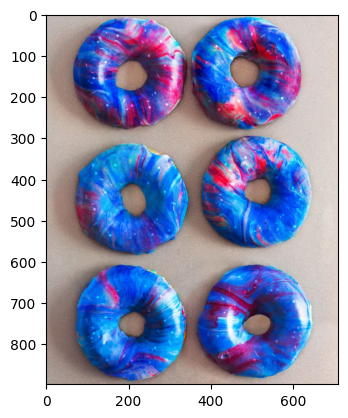

(898, 710, 3)

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# verify image "works" by displaying it, after correcting color
img = cv2.imread('image.webp')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()
img.shape

### Problem: How to distinguish donuts from background? (*Eat the donut, not the table!*)

Potential difficulties:  
* shadows
* multi-colored frosting
* glossy-surface reflections
* the donut holes

In [3]:
# convert from tensor to matrix, i.e. partially flatten
print('img shape:', img.shape)
twoDimage = img.reshape((-1,3))
twoDimage = np.float32(twoDimage)
print('new img shape:', twoDimage.shape)

img shape: (898, 710, 3)
new img shape: (637580, 3)


https://docs.opencv.org/4.x/d5/d38/group__core__cluster.html   



In [9]:
# run the kmeans algorithm
ret, label, center = cv2.kmeans( twoDimage,
                                2,
                                None,
                                (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0),
                                5,
                                cv2.KMEANS_PP_CENTERS)

![](https://sandipanweb.files.wordpress.com/2016/08/kmeans11.gif?w=676)

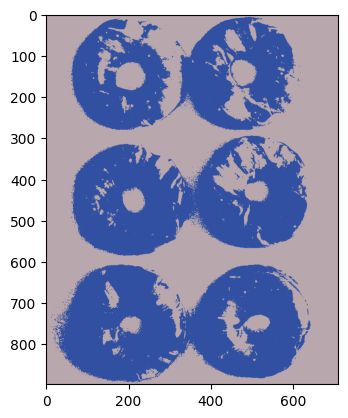

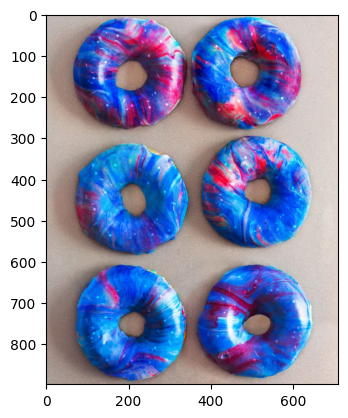

In [10]:
center = np.uint8(center)
res = center[label.flatten()]
new_img = res.reshape((img.shape))
plt.imshow(new_img)
plt.figure()
plt.imshow(img)
plt.show()